In [ ]:
#|default_exp app

# Cap Recognizer

In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.9 MB/s eta 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Balls_Category

/content/drive/My Drive/Balls_Category


In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
#!export
model = load_learner('models/Ball_Recognizer-v1.pkl')

In [ ]:
#!export

ball_labels = [
    "Base ball",
"Cricket Ball",
"Soccer Ball",
"Basket Ball",
"Tennis Ball",
"Billiard Ball",
"Bowling Ball",
"Rugby Ball",
"Ping Pong Ball",
"Squash Ball",
"Volley Ball",
"Golf Ball"
]

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(ball_labels, map(float, probs)))

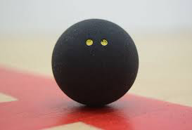

In [ ]:
img = PILImage.create(f'test_image/3.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

{'Base ball': 1.5905343389022164e-06,
 'Cricket Ball': 2.2120943299341889e-07,
 'Soccer Ball': 6.5211529545194935e-06,
 'Basket Ball': 1.619899194338359e-05,
 'Tennis Ball': 5.338008008948236e-07,
 'Billiard Ball': 1.2243468745509745e-06,
 'Bowling Ball': 1.1372614608262666e-05,
 'Rugby Ball': 8.530157202812916e-08,
 'Ping Pong Ball': 5.724262841511063e-09,
 'Squash Ball': 0.999954104423523,
 'Volley Ball': 4.06321032642154e-06,
 'Golf Ball': 4.081374299857998e-06}

In [ ]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test_image/1.png',
    'test_image/2.jpg',
    'test_image/3.jpg',

    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1a3f13a579e485a087.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')